<a href="https://colab.research.google.com/github/dheekshu111/LearningML/blob/main/ML_First.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Sample Project**

## **Load Data**

This step loads the csv file into a variable. We use the read_csv method from pandas.

In [ ]:
import pandas as pd

dataFrame = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
dataFrame

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## **Data Preparation**

### Data Seperation as X and y

In this step, we will seperate the data into x and y. The first 4 columns are the x values. The last column (logS) is the y value.

In order to seperate y, we just get the y column and assign it to the variable 'y'

In [ ]:
y = dataFrame['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In order to seperate x, we can just drop the y column (logS column). The axis argument specifies if you want to drop a column or row. If you use 1, then it is column

In [ ]:
X = dataFrame.drop('logS', axis = 1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### Data Splitting

Now we are going to split the data into a training and testing set. We can split 80:20, because that is usually the norm

We have four different variables. The X_train holds the training data for x values, X_test holds the testing data for x values. The same applies for y value. We specify the test size using the 80:20 ratio. random_state makes sure we get the same training and testing data each time we run the code

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

## **Model Building**

For the first option, we are going to use Linear Regression model.

### **Linear Regression**

#### Training the Model
Our first step would be training the model using our training data sets.

In [ ]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
linReg.fit(X_train, y_train)

LinearRegression()

#### Applying the Model (Prediction)
Our next step would be applying the model. We can test our model against our testing data set to make a prediction.

In [ ]:
y_linReg_train_pred = linReg.predict(X_train)
y_linReg_test_pred = linReg.predict(X_test)

In [ ]:
y_linReg_train_pred

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

In [ ]:
y_linReg_test_pred

array([-3.05722870e+00, -7.77785827e+00, -2.55016650e+00, -2.01523582e+00,
       -2.06375990e+00, -9.99672215e-01, -5.94603364e-01, -5.53626003e-01,
       -5.72200956e+00, -3.94006681e+00, -3.95496755e+00, -2.29737009e+00,
       -1.48980354e+00, -1.48988982e+00, -4.64510806e+00, -1.90396018e+00,
       -1.51566313e+00, -3.16424605e+00, -3.70863920e+00, -5.58105660e+00,
       -3.25038467e+00, -5.04235077e+00, -5.69194881e+00, -2.14339849e+00,
       -4.35689341e+00, -5.03964756e+00, -3.10383618e+00, -4.40286964e+00,
       -4.21276272e+00,  5.56508349e-01, -1.45537678e+00, -4.41027396e+00,
       -2.59668773e+00, -1.53336276e+00, -5.55749874e-01, -1.67111795e+00,
       -2.78163675e+00, -3.15395565e+00, -5.27083361e+00, -1.75321446e+00,
       -1.53350725e+00, -2.01255666e+00, -6.57559167e+00, -7.89433046e+00,
       -5.76437127e+00, -4.16422068e+00, -3.43694663e+00,  1.43834212e+00,
       -1.12679105e-02, -2.34521849e+00, -1.86480046e+00, -5.03964756e+00,
        8.55886378e-01, -

#### Evaluate Model Performance

Now we can calculate how well our model has performed by comparing the training prediction and the testing prediction.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

linReg_train_mse = mean_squared_error(y_train, y_linReg_train_pred)
linReg_train_r2 = r2_score(y_train, y_linReg_train_pred)

linReg_test_mse = mean_squared_error(y_test, y_linReg_test_pred)
linReg_test_r2 = r2_score(y_test, y_linReg_test_pred)

**MSE:** The Mean Squared Error measures how close a regression line is to a set of data points.The smaller the MSE, the better the model's predictive accuracy

**R2:** R-Squared (R² or the coefficient of determination) measures in a regression model the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit). A higher R-squared indicates the model is a good fit. They range from 0 to 1.

In [ ]:
print("Linear Regression MSE (Train): ", linReg_train_mse)
print("Linear Regression R2 (Train): ", linReg_train_r2)
print("Linear Regression MSE (Test): ", linReg_test_mse)
print("Linear Regression R2 (Test): ", linReg_test_r2)

Linear Regression MSE (Train):  1.0075362951093687
Linear Regression R2 (Train):  0.7645051774663391
Linear Regression MSE (Test):  1.0206953660861033
Linear Regression R2 (Test):  0.7891616188563282


We can put these values in a tabular format for better readability. We can also name the columns so it is represented clearly.

In [ ]:
lin_results = pd.DataFrame(['Linear Regression', linReg_train_mse, linReg_train_r2, linReg_test_mse, linReg_test_r2]).transpose()
lin_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]

In [ ]:
lin_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


### **Random Forest**

Secondly, we are going to build a random forest model

#### Training the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state = 100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

#### Applying the Model

In [ ]:
y_ranFor_train_pred = rf.predict(X_train)
y_ranFor_test_pred = rf.predict(X_test)

#### Evaluate Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

ranFor_train_mse = mean_squared_error(y_train, y_ranFor_train_pred)
ranFor_train_r2 = r2_score(y_train, y_ranFor_train_pred)

ranFor_test_mse = mean_squared_error(y_test, y_ranFor_test_pred)
ranFor_test_r2 = r2_score(y_test, y_ranFor_test_pred)

In [ ]:
ran_results = pd.DataFrame(['Random Forest', ranFor_train_mse, ranFor_train_r2, ranFor_test_mse, ranFor_test_r2]).transpose()
ran_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]
ran_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


### **Model Comparison**

We are combining the tables for the different models into a single table.

In [ ]:
combine_models = pd.concat([lin_results, ran_results], axis = 0)
combine_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,1.028228,0.759669,1.407688,0.709223


The index needs to be reset. We do drop = True so that we don't a column name called index.

In [ ]:
combine_models.reset_index(drop = True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


## **Data Visualization of Prediction results**

Numpy is used to put a trend line in the plot.

figure: figsize: so that the plot is sized the same in both direction.

c: specifies colour

alpha: Regions that have multiple circles will have a darked shading.

Text(0.5, 0, 'Experimental LogS')

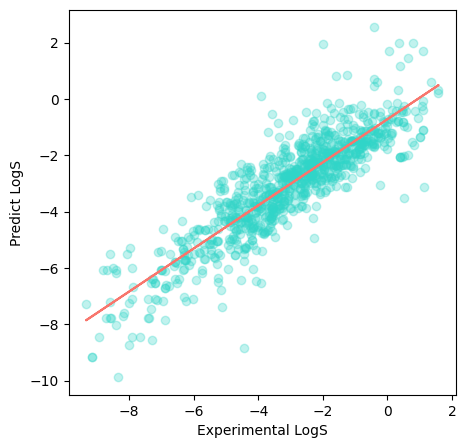

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (5,5))
plt.scatter(x = y_train, y = y_linReg_train_pred, c="#30D5C8", alpha = 0.3)

z = np.polyfit(y_train, y_linReg_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), "#F8766D")
plt.plot()
plt.ylabel("Predict LogS")
plt.xlabel("Experimental LogS")